# What's the fuss?

Fandango is an American movie company that sells movie tickets. They provide a rating for each film, comprised of ratings by people. In 2015, fivethirtyeight discovered evidence that suggested the displayed ratings were inflated. Namely:

- Many movie ratings that should not have been rounded up were rounded up to the nearest half star. This could have happenned by .3-.4 stars.
- In 8% of cases, movies were rounded up by .5 stars. There was speculation that figures such as 4.51 were being rounded to 5 stars.

Here's a diagram from fivethirtyeight that illustrates the problem:

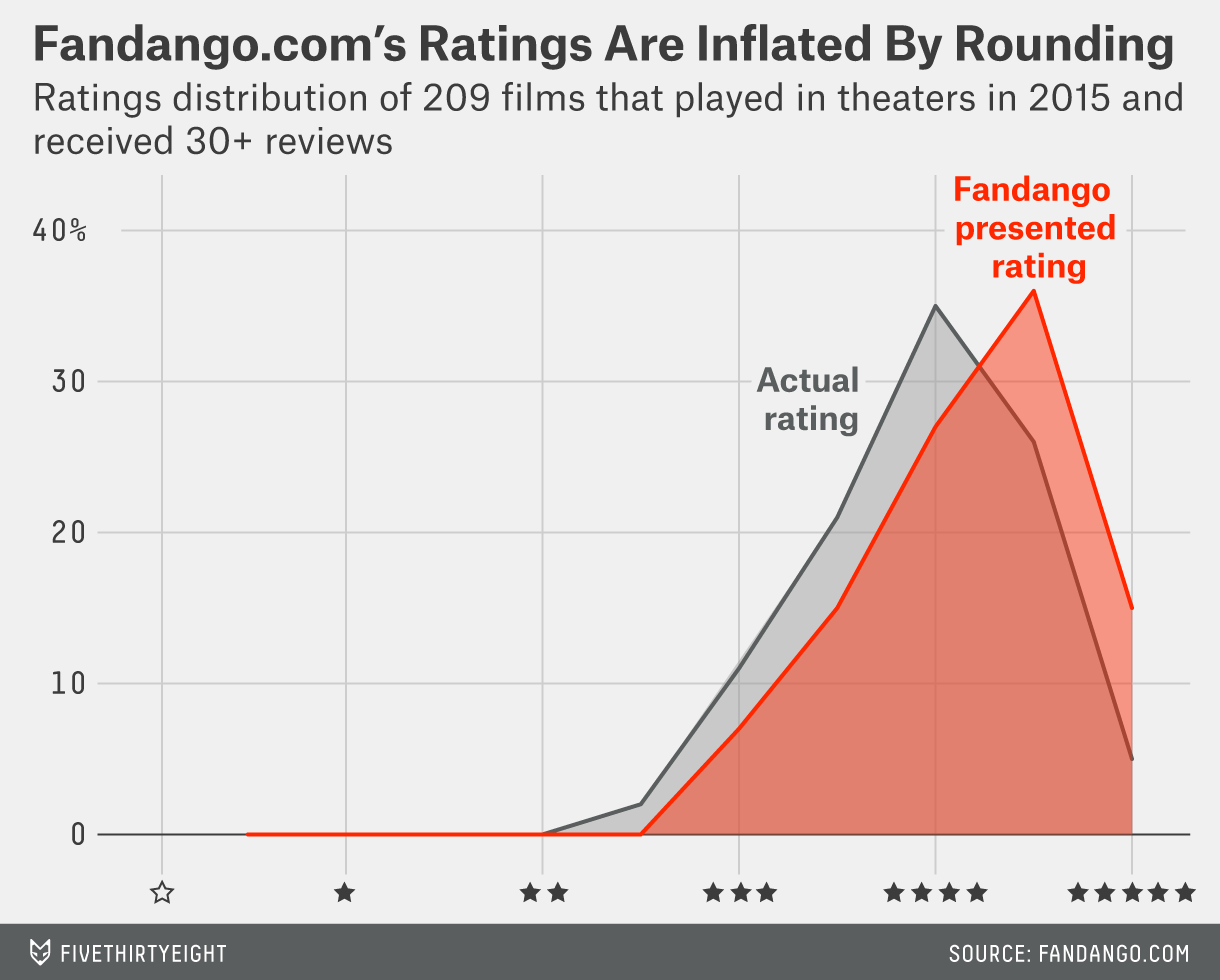

In [5]:
from IPython.display import Image
Image(url='https://fivethirtyeight.com/wp-content/uploads/2015/10/hickey-datalab-fandango-3.png', embed=True)

Since we have fandango data from 2014-2015 and current movie data from 2016-2017, the aim is to find out if the way fandango rates movies have changed since the article on fivethirtyeight was released. The fandango variable therefore represents data before the analysis by fivethirtyeight was released (data used by fivethirtyeight), however the current data represents movies from a time period where fandango should have had time to implement a fix to what they called a rating bug. Unfortunately, it is no longer possible to scrape the 'unrounded' ratings from fandango's site. Thus, we have to make do with comparing the fandango ratings from 2014-2015 to the one from 2016-2017.

## First import what's needed and read the data in

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fandango = pd.read_csv('fandango_score_comparison.csv')
current = pd.read_csv('movie_ratings_16_17.csv')

In [11]:
print(fandango.shape)
fandango.head(2)

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


Above you can see the first 2 rows of the fandango dataset. Each row represents a film, so we can see there are 146 films that were analysed by fivethirtyeight.

In [10]:
print(current.shape)
current.head(2)

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Above you can see the first 2 rows of the current dataset. As before, each row represents a film, so there are 214 films in total.

## An issue of sampling
One thing that is immediately clear is that the selection of movies into these files have not followed an ideal sampling strategy for our question. The population we are interested in refers to the entire collection of movies that contain ratings on Fandango's website. However, the fandango file only contains 146 movies and the current file contains 214 movies. 

If we look at the sampling strategies for __fandango__, we can find a few things:

1. It has a Rotten Tomatoes rating
2. It has a RT User rating
3. It has a Metacritic score
4. It has a Metacritic User score
5. It has a IMDb score
6. It has a minimum number of 30 fandango ratings

If we look at the sampling strategies for __current__, we see a few things:

1. The 214 movies are the most popular movies from 2016-2017
2. There must have been a "significant number" of ratings for the movie

## Changing the aim
If we examine the sampling criteria for fandango appears to encourage the selection of popular movies. To have obtained a rating from all the mentioned sites, and have 30 ratings on fandango requires the film to have at least some sort of popularity. If we look at the current dataset, it makes it clear that the 214 most popular movies were sampled.

It would therefore make sense to alter our aim here to investigating whether fandango's rating system of __popular movies__ have changed. However, it would also be nice if we could inspect the fandango dataset more to make sure they are indeed popular films.

In [18]:
# Checking the fandango dataset one more time to make sure it has > 30 ratings on fandango
print(fandango[fandango.Fandango_votes > 30].shape)
print(fandango.shape)

(146, 22)
(146, 22)


In [24]:
fandango2 = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
current2 = current[['movie', 'year', 'fandango']]

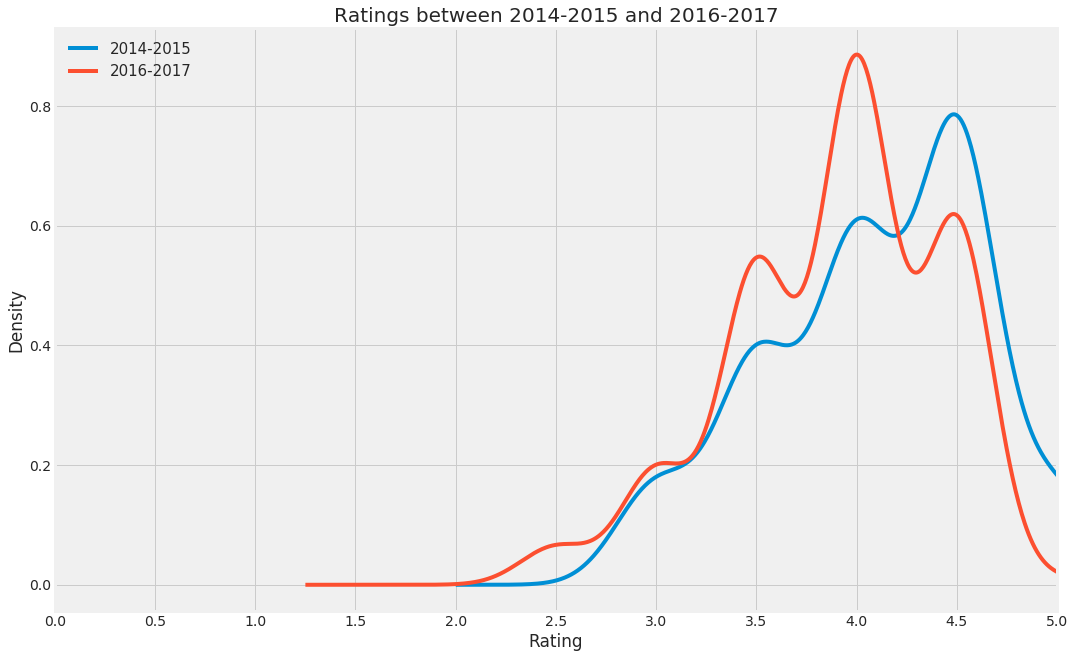

In [61]:
# Plotting a kernal density plot
plt.figure(figsize = (16,10))
plt.style.use('fivethirtyeight')
fandango2['Fandango_Stars'].plot.kde(label = '2014-2015', legend = True)
current2['fandango'].plot.kde(label = '2016-2017', legend = True)
plt.xlabel('Rating')
plt.legend(loc = 2, prop = {'size':15})
plt.title('Ratings between 2014-2015 and 2016-2017', fontsize = 20)
plt.xlim(0,5)
plt.xticks(np.arange(0,5.5,.5))
plt.show()

From looking at the fandango ratings from 2014-2015 and 2016-2017, we can notice a few things. Both are left skewed. This is odd, because it means we hardly see any ratings that are lower than 3. There is a higher density at the top end of the ratings for the fandango data from 2014-2015. The ratings from 2016-2017 seem to be slightly lower for 'popular movies'. 

In [71]:
print(fandango2['Fandango_Stars'].value_counts(normalize = True).sort_index()*100, '\n\n',
      current2['fandango'].value_counts(normalize = True).sort_index()*100)

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64 

 2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64


The value counts for 2014-2015 (top) and 2016-2017 (bottom) make it clear to us that movies from 2016-2017 seem to have got a lower score in general. However, it's still not possible to say for sure that this is because fandango fixed their rating system, or if movies from 2016-2017 were worse.

In [109]:
early = fandango2['Fandango_Stars']
late = current['fandango']

In [228]:
df = pd.concat([pd.DataFrame([early.mean(),early.median(),early.mode()[0]]),
           pd.DataFrame([late.mean(),late.median(),late.mode()[0]])], 1)
df.reset_index(drop = True, inplace = True)
df.columns = ['2014-2015','2016-2017']
df.index = ['Mean','Median','Mode']

(0, 5.5)

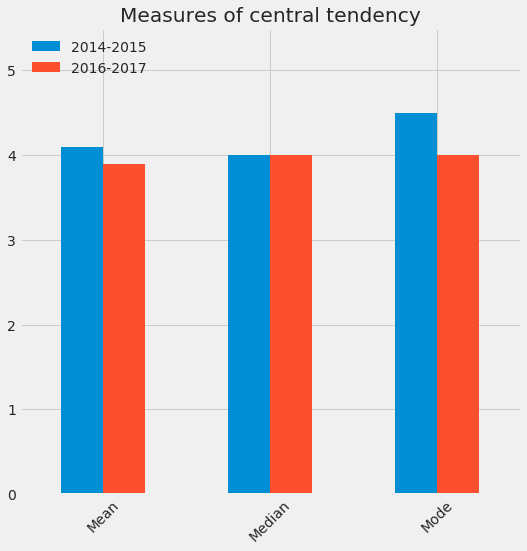

In [235]:
df.plot.bar(rot = 45, figsize = (8,8), title = 'Measures of central tendency')
plt.legend(loc = 2)
plt.ylim(0,5.5)

## Summary
We can see that the 2016-2017 films have a lower mean and mode rating compared to the 2014-2015 films. Perhaps the reason the median remains the same is because it is less affected by the extremely high ratings in 2014-2015. Overall, there seems to be some evidence that the fandango ratings have become more conservative this year. However, without access to the actual ratings (not possible to scrape anymore) - it is difficult to conclude if this is the result of less well received films in 2016-2017 or a change in fandango's rating system.